<a href="https://colab.research.google.com/github/Engr-Usman-Ali/CodeAlpha_Task_Car_Prediction/blob/main/CodeAlpha_Task_Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
!git clone https://github.com/Engr-Usman-Ali/CodeAlpha_Task_Car_Prediction.git

fatal: destination path 'CodeAlpha_Task_Car_Prediction' already exists and is not an empty directory.


In [13]:
# Step 1: Load the dataset
url = "/content/CodeAlpha_Task_Car_Prediction/car data.csv"
df = pd.read_csv(url)

In [14]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Convert categorical data to numerical using Label Encoding
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for future use

Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [15]:
# Define features and target variable
X = df.drop(columns=['Selling_Price'])  # Assuming 'Selling_Price' is the target variable
y = df['Selling_Price']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 0.6021245901639346
Mean Squared Error: 0.8095236183606556
Root Mean Squared Error: 0.8997353046094476
R-squared Score: 0.9648576914708802


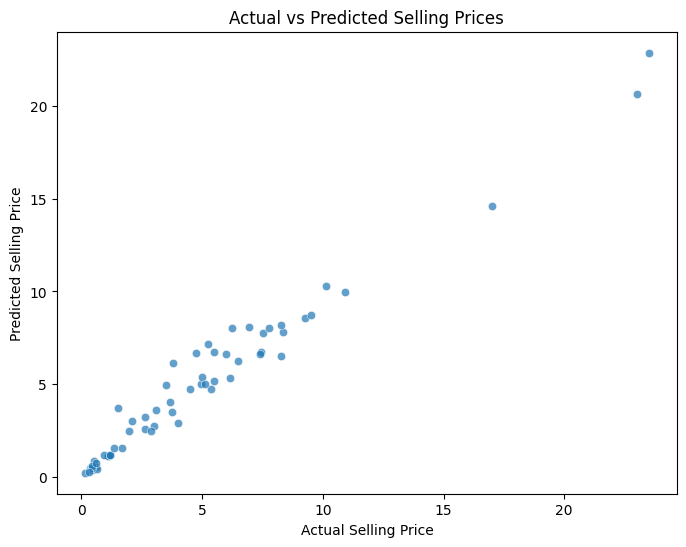

In [19]:
# Actual vs Predicted Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Prices")
plt.show()